In [1]:
!pip install wfdb pandas matplotlib scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_old = pd.read_csv('Dataset/ptbxl/ptbxl_database.csv')
df_old.head(5)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [3]:
df = ['patient_id', 'age', 'sex', 'weight','heart_axis','pacemaker', 'static_noise','filename_lr', 'filename_hr']
df = df_old[df]

# Display the first few rows of the reduced dataset
df.head()

,patient_id,age,sex,weight,heart_axis,pacemaker,static_noise,filename_lr,filename_hr
0,15709.0,56.0,1,63.0,NaN,NaN,", I-V1,",records100/00000/00001_lr,records500/00000/00001_hr
1,13243.0,19.0,0,70.0,NaN,NaN,NaN,records100/00000/00002_lr,records500/00000/00002_hr
2,20372.0,37.0,1,69.0,NaN,NaN,NaN,records100/00000/00003_lr,records500/00000/00003_hr
3,17014.0,24.0,0,82.0,NaN,NaN,NaN,records100/00000/00004_lr,records500/00000/00004_hr
4,17448.0,19.0,1,70.0,NaN,NaN,NaN,records100/00000/00005_lr,records500/00000/00005_hr


# prepared data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare data
df_cleaned = df[['age', 'sex']].dropna()
df_cleaned['sex'] = df_cleaned['sex'].map({0: 'Female', 1: 'Male'})


# male and female pie chart


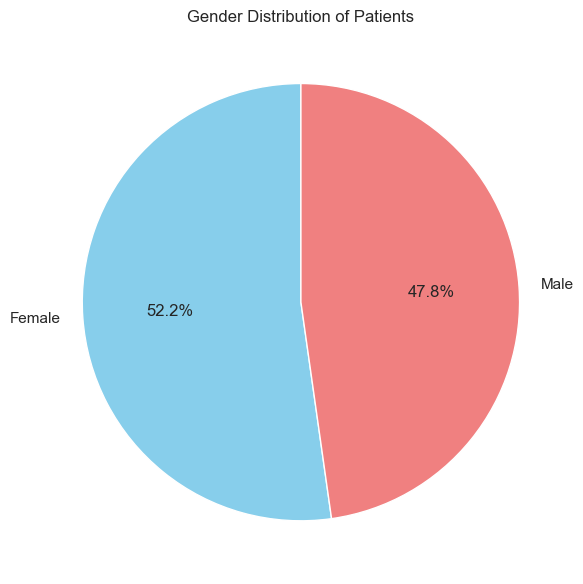

In [5]:
# Set style
sns.set(style="whitegrid")

# 1. Pie Chart: Gender Distribution
gender_counts = df_cleaned['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Patients')
plt.axis('equal')
plt.tight_layout()
plt.show()

#  Histogram: Age Distribution

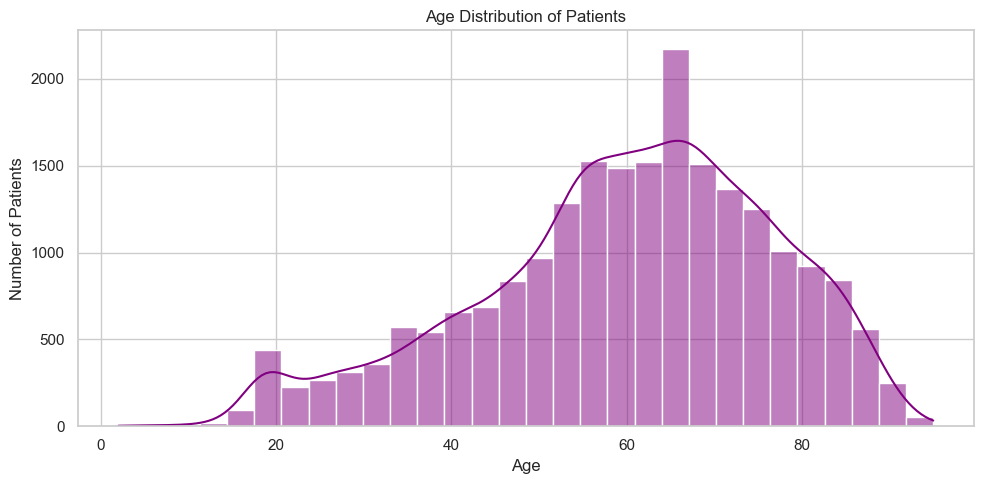

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Box Plot: Age Distribution by Gender

C:\Users\estya\AppData\Local\Temp\ipykernel_7032\2899095000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df_cleaned, palette='pastel')


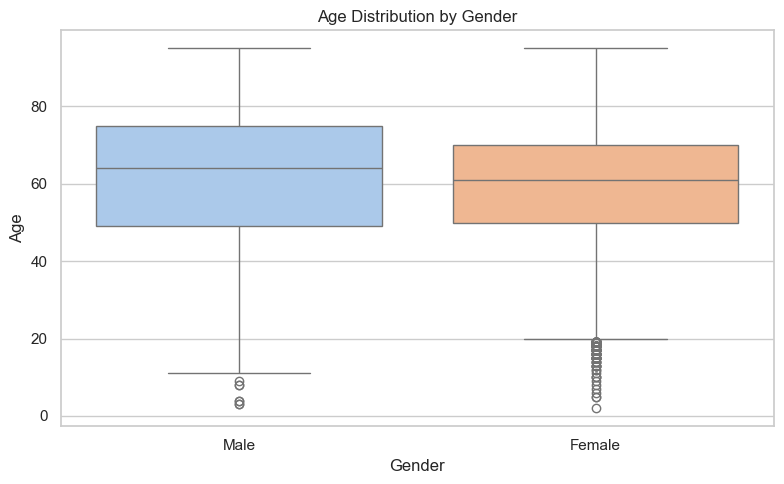

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='age', data=df_cleaned, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Count Plot: Age Groups by Gender

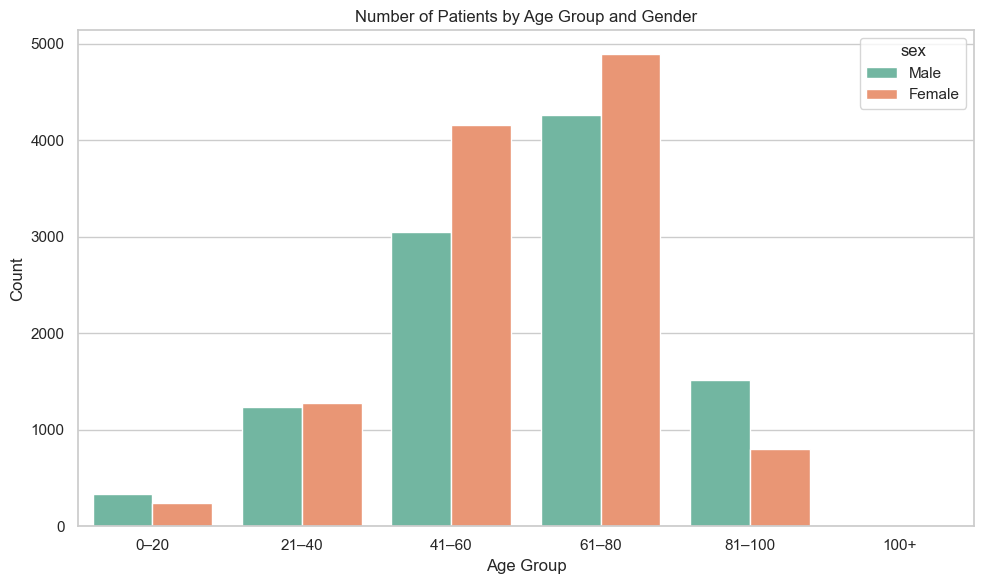

In [8]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 20, 40, 60, 80, 100, 120], 
                                 labels=['0–20', '21–40', '41–60', '61–80', '81–100', '100+'])

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='sex', data=df_cleaned, palette='Set2')
plt.title('Number of Patients by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [9]:
df.to_csv("dmeo_3_ptbxl_dataset.csv", index=False)

In [10]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    21837 non-null  float64
 1   age           21748 non-null  float64
 2   sex           21837 non-null  int64  
 3   weight        9429 non-null   float64
 4   heart_axis    13332 non-null  object 
 5   pacemaker     293 non-null    object 
 6   static_noise  3262 non-null   object 
 7   filename_lr   21837 non-null  object 
 8   filename_hr   21837 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ MB


In [11]:
print(df['heart_axis'].unique())  #

[nan 'LAD' 'ALAD' 'RAD' 'AXR' 'MID' 'ARAD' 'AXL' 'SAG']


In [12]:
df['heart_axis'].isna().sum()  #

8505

In [13]:
df['heart_axis'].fillna('UNKNOWN', inplace=True)

C:\Users\estya\AppData\Local\Temp\ipykernel_7032\32126984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['heart_axis'].fillna('UNKNOWN', inplace=True)
C:\Users\estya\AppData\Local\Temp\ipykernel_7032\32126984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_axis'].fillna('UNKNOWN', inplace=True)


In [14]:
df['heart_axis'].isna().sum()  #

0

In [15]:
df = pd.get_dummies(df, columns=['heart_axis'])

In [16]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          21837 non-null  float64
 1   age                 21748 non-null  float64
 2   sex                 21837 non-null  int64  
 3   weight              9429 non-null   float64
 4   pacemaker           293 non-null    object 
 5   static_noise        3262 non-null   object 
 6   filename_lr         21837 non-null  object 
 7   filename_hr         21837 non-null  object 
 8   heart_axis_ALAD     21837 non-null  bool   
 9   heart_axis_ARAD     21837 non-null  bool   
 10  heart_axis_AXL      21837 non-null  bool   
 11  heart_axis_AXR      21837 non-null  bool   
 12  heart_axis_LAD      21837 non-null  bool   
 13  heart_axis_MID      21837 non-null  bool   
 14  heart_axis_RAD      21837 non-null  bool   
 15  heart_axis_SAG      21837 non-null  bool   
 16  hear

# work with weigth

In [17]:
df['weight'].isna().sum()  #

12408

In [18]:
df['weight'].fillna(df['weight'].median(), inplace=True)

C:\Users\estya\AppData\Local\Temp\ipykernel_7032\3362686935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(df['weight'].median(), inplace=True)


In [19]:
df['weight'].isna().sum()  #

0

In [20]:
df['weight'] = df['weight'].astype(int)


In [21]:
print(df['weight'])  # Display unique values in 'heart_axis'

0        63
1        70
2        69
3        82
4        70
         ..
21832    70
21833    70
21834    70
21835    70
21836    70
Name: weight, Length: 21837, dtype: int32


# work withb sex

In [22]:
df['sex'].isna().sum()  #

0

 # Work with static_noise

In [23]:
df['static_noise'].isna().sum()  #

18575

In [24]:
print(df['static_noise'])

0          , I-V1,  
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
21832     , alles,  
21833            NaN
21834     , I-AVR,  
21835            NaN
21836     , I-AVL,  
Name: static_noise, Length: 21837, dtype: object


In [25]:
df['static_noise'].unique()  # Display unique values in 'static_noise'

array([' , I-V1,  ', nan, ' , I-AVF,  ', ' , I-AVR,  ', ' , I-AVL,  ',
       ' , alles,  ', ' , I-V2,  ', ' , V1,  ', ' , I,III-AVR,  ',
       ' , leicht,  ', ' , I,II,AVR,AVL.AVF,V1,  ', ' , V2,  ',
       ' , I,II,AVL,  ', ' , I ,  ', ' , v2 mittel,  ', ' , stark,  ',
       ' , mittel,  ', 'leicht,  ,  ', ' , I,III,AVL-V2,  ',
       ' , noisy recording,', ' , noise,  ', ' , I-AVF,V6,  ',
       ' , I,III,AVL,  ', ' , I,II,AVL,AVR,  ', ' , I,II,AVR,  ',
       ' , I,II,  ', ' , v3,  ', ' , V3,  ', ' , I,III,  ', ' , V1,V2,  ',
       ' , I-V3,  ', 'I stark,  ,  ', ' , I,II,AVF,  ', ' , I-III,  ',
       ' , mittel, noisy recording,', ' , I -AVF,  ', ' , I-ALF,  ',
       ' , AVL,  ', ' , I,II,AVL,V2,  ', ' , alles, noisy recording,',
       ' , V6,  ', 'leicht, leicht,  ', 'mittel,  ,  ', ' , I,  ',
       ' , I,II,AVL,V5;V6,  ', ' , I-Avr,  ', ' , I - AVF,  ',
       ' , I-V4,  ', ' , I,AVL,  ', ' , I - AVR,  ', ' , I,III,AVL,V1,  ',
       ' , V4,  ', ' , I,II,V5,  ', 'alle,  , 

In [26]:
import numpy as np

# Step 1: Convert to string and strip whitespace
df['static_noise'] = df['static_noise'].astype(str).str.strip()

# Step 2: Replace garbage/missing-like values with real NaN
df['static_noise'] = df['static_noise'].replace(
    to_replace=['', ' ', 'nan', 'NaN', 'NAN', 'None', 'null', 'Null', ' , ', ' ,  ', ' ,  ,  '],
    value=np.nan
)

# Step 3: Optional - normalize (e.g., lowercase, remove extra spaces, fix dashes)
df['static_noise'] = df['static_noise'].str.lower().str.replace('-', '_').str.strip()


In [27]:
df['static_noise'].unique()  # Display unique values in 'static_noise'

array([', i_v1,', nan, ', i_avf,', ', i_avr,', ', i_avl,', ', alles,',
       ', i_v2,', ', v1,', ', i,iii_avr,', ', leicht,',
       ', i,ii,avr,avl.avf,v1,', ', v2,', ', i,ii,avl,', ', i ,',
       ', v2 mittel,', ', stark,', ', mittel,', 'leicht,  ,',
       ', i,iii,avl_v2,', ', noisy recording,', ', noise,', ', i_avf,v6,',
       ', i,iii,avl,', ', i,ii,avl,avr,', ', i,ii,avr,', ', i,ii,',
       ', v3,', ', i,iii,', ', v1,v2,', ', i_v3,', 'i stark,  ,',
       ', i,ii,avf,', ', i_iii,', ', mittel, noisy recording,',
       ', i _avf,', ', i_alf,', ', avl,', ', i,ii,avl,v2,',
       ', alles, noisy recording,', ', v6,', 'leicht, leicht,',
       'mittel,  ,', ', i,', ', i,ii,avl,v5;v6,', ', i _ avf,', ', i_v4,',
       ', i,avl,', ', i _ avr,', ', i,iii,avl,v1,', ', v4,', ', i,ii,v5,',
       'alle,  ,', ', avl,v2,', 'i,ii,iii.avr,avl,  ,', ', i,avl,v3,',
       ', stark, noisy recording,', ', i_v2,v5,v6,', ', i,avl,v1,',
       ', v5,', ', i,iii,avl,avr,', ', i _ v2,v5,v6,',
    

In [28]:
df['static_noise'].isna().sum()  #

18575

In [29]:
df['static_noise'] = df['static_noise'].fillna('unknown')


In [30]:
df['static_noise'].isna().sum()  #

0

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['static_noise'] = le.fit_transform(df['heart_axis'])

KeyError: 'heart_axis'

In [ ]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          21837 non-null  float64
 1   age                 21748 non-null  float64
 2   sex                 21837 non-null  int64  
 3   weight              21837 non-null  int32  
 4   pacemaker           293 non-null    object 
 5   static_noise        21837 non-null  object 
 6   filename_lr         21837 non-null  object 
 7   filename_hr         21837 non-null  object 
 8   heart_axis_ALAD     21837 non-null  bool   
 9   heart_axis_ARAD     21837 non-null  bool   
 10  heart_axis_AXL      21837 non-null  bool   
 11  heart_axis_AXR      21837 non-null  bool   
 12  heart_axis_LAD      21837 non-null  bool   
 13  heart_axis_MID      21837 non-null  bool   
 14  heart_axis_RAD      21837 non-null  bool   
 15  heart_axis_SAG      21837 non-null  bool   
 16  hear

<Figure size 1000x500 with 0 Axes>

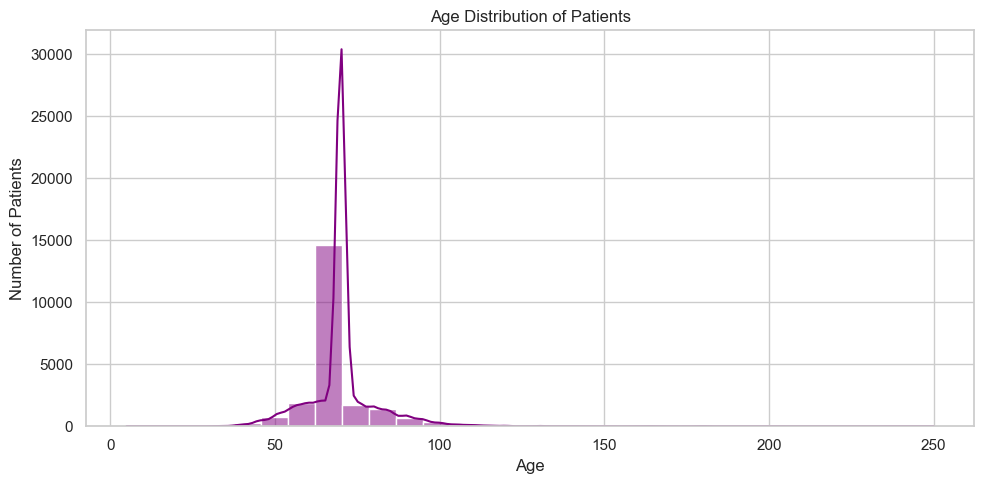

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['weight'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

In [ ]:
df['patient_id']

0        15709.0
1        13243.0
2        20372.0
3        17014.0
4        17448.0
          ...   
21832    17180.0
21833    20703.0
21834    19311.0
21835     8873.0
21836    11744.0
Name: patient_id, Length: 21837, dtype: float64

In [ ]:
df['patient_id'] = df['patient_id'].astype(int)
df['patient_id'] = range(1, len(df) + 1)

In [ ]:
df['patient_id']

0            1
1            2
2            3
3            4
4            5
         ...  
21832    21833
21833    21834
21834    21835
21835    21836
21836    21837
Name: patient_id, Length: 21837, dtype: int64

In [ ]:
df.to_csv('demo3_dataset.csv', index=False)

In [ ]:
df['filename_lr']

0        records100/00000/00001_lr
1        records100/00000/00002_lr
2        records100/00000/00003_lr
3        records100/00000/00004_lr
4        records100/00000/00005_lr
                   ...            
21832    records100/21000/21833_lr
21833    records100/21000/21834_lr
21834    records100/21000/21835_lr
21835    records100/21000/21836_lr
21836    records100/21000/21837_lr
Name: filename_lr, Length: 21837, dtype: object

In [ ]:
for i, row in df.iterrows():
    filename = os.path.basename(row['filename_hr']).replace('_hr', '_numpy') + '.npy'
    signal_path = os.path.join(base_path, filename)

    if not os.path.exists(signal_path):
        print(f"Missing file: {signal_path}")
        continue

    try:
        signal = np.load(signal_path, allow_pickle=True)
        label = row['diagnostic_class']
        print(f"{filename} loaded, label: {label}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")


Missing file: Dataset/ptbxl/records500/00001_numpy.npy
Missing file: Dataset/ptbxl/records500/00002_numpy.npy
Missing file: Dataset/ptbxl/records500/00003_numpy.npy
Missing file: Dataset/ptbxl/records500/00004_numpy.npy
Missing file: Dataset/ptbxl/records500/00005_numpy.npy
Missing file: Dataset/ptbxl/records500/00006_numpy.npy
Missing file: Dataset/ptbxl/records500/00007_numpy.npy
Missing file: Dataset/ptbxl/records500/00008_numpy.npy
Missing file: Dataset/ptbxl/records500/00009_numpy.npy
Missing file: Dataset/ptbxl/records500/00010_numpy.npy
Missing file: Dataset/ptbxl/records500/00011_numpy.npy
Missing file: Dataset/ptbxl/records500/00012_numpy.npy
Missing file: Dataset/ptbxl/records500/00013_numpy.npy
Missing file: Dataset/ptbxl/records500/00014_numpy.npy
Missing file: Dataset/ptbxl/records500/00015_numpy.npy
Missing file: Dataset/ptbxl/records500/00016_numpy.npy
Missing file: Dataset/ptbxl/records500/00017_numpy.npy
Missing file: Dataset/ptbxl/records500/00018_numpy.npy
Missing fi

In [ ]:
print(df['filename_hr'].head(10))

0    records500/00000/00001_hr
1    records500/00000/00002_hr
2    records500/00000/00003_hr
3    records500/00000/00004_hr
4    records500/00000/00005_hr
5    records500/00000/00006_hr
6    records500/00000/00007_hr
7    records500/00000/00008_hr
8    records500/00000/00009_hr
9    records500/00000/00010_hr
Name: filename_hr, dtype: object


In [ ]:
df['height'].isna().sum()  #

KeyError: 'height'